In [42]:
#from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#print(tf.__version__)
#loading data
digits_mnist=tf.keras.datasets.mnist
(train_input,train_labels),(test_input,test_labels)=digits_mnist.load_data()


In [43]:
train_input=train_input/255.0
test_input=test_input/255.0
class_names=['zero','one','two','three','four','five','six','seven','eight','nine']

In [91]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(900,activation=tf.nn.relu),
                        #keras.layers.Dense(500,activation=tf.nn.relu),
                        #keras.layers.Dense(100,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.sigmoid)
                       ])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_input,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 48s 798us/sample - loss: 0.2061 - acc: 0.9386
Epoch 2/5
60000/60000 [==============================] - 49s 817us/sample - loss: 0.0813 - acc: 0.9748
Epoch 3/5
60000/60000 [==============================] - 49s 810us/sample - loss: 0.0530 - acc: 0.9837
Epoch 4/5
60000/60000 [==============================] - 49s 809us/sample - loss: 0.0375 - acc: 0.9879
Epoch 5/5
60000/60000 [==============================] - 49s 821us/sample - loss: 0.0285 - acc: 0.9906


In [92]:
test_loss,test_accuracy=model.evaluate(test_input,test_labels)
print('Test Accuracy: ',test_accuracy)

10000/10000 [==============================] - 2s 167us/sample - loss: 0.0820 - acc: 0.9752
Test Accuracy:  0.9752


In [50]:
predictions=model.predict(test_input)
predictions[0]
print('Prediction:',np.argmax(predictions[0]))
print('Test label',test_labels[0])

Prediction: 7
Test label 7


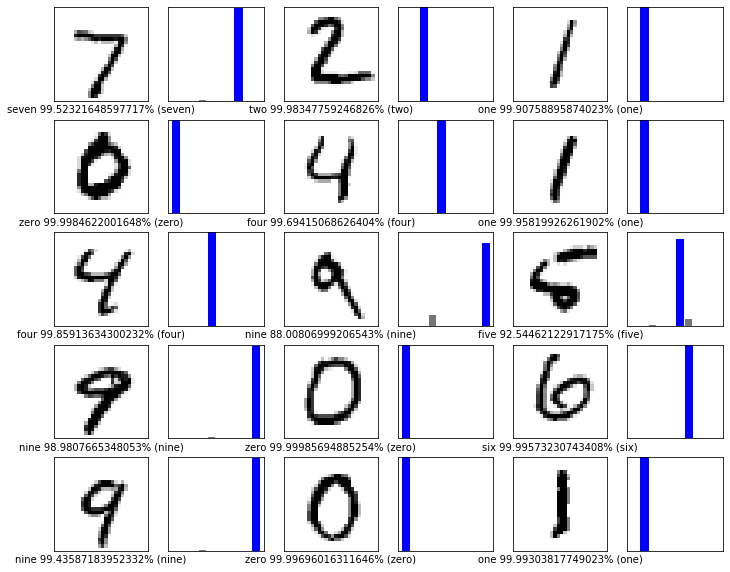

In [59]:
def plot_img(i,predictions,test_labels,img):
    predict_array,true_label,img=predictions[i],test_labels[i],img[i]
    predict_label=np.argmax(predict_array)
    if(predict_label==true_label):
        colour='blue'
    else:
        colour='red'
    plt.xticks([])    
    plt.yticks([])   
    plt.grid(False)
    plt.imshow(img,cmap=plt.cm.binary)   
    plt.xlabel('{} {}% ({})'.format(class_names[predict_label],100*np.max(predict_array),class_names[true_label],color=colour))
    
def plot_value_array(i,predictions,test_labels):
    predict_array,true_label=predictions[i],test_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predict_array,color="#777777")
    plt.ylim([0,1])
    predict_label=np.argmax(predict_array)
    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img(i, predictions, test_labels, test_input)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()